In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/lego_sets.csv")

In [3]:
df

,Details,Pricing,Quick Buy,Set Predictions,Set Facts,Subtheme Analysis
0,001-1,C$6.68,~C$615.16,C$641.65,Set Facts\nThe set was only available in the U...,82
1,Gears,C$597.24,C$578.69 (ES),C$779.64,NaN,1961 - 1975
2,Samsonite,+8837.37%,NaN,NaN,NaN,+7.02% (this set +8.06%)
3,Basic Set,+8.06%,NaN,NaN,NaN,NaN
4,1965,C$47.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74,Samsonite,+3856.57%,NaN,NaN,NaN,+7.02% (this set +6.44%)
75,Basic Set,+6.44%,NaN,NaN,NaN,NaN
76,1965,1.07%,NaN,NaN,NaN,NaN
77,Retired,C$60.75,NaN,NaN,NaN,NaN


In [4]:

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values in other columns
df['Pricing'] = df['Pricing'].fillna(0)

# Convert "Details" column to string data type
df['Details'] = df['Details'].astype(str)

# Standardize currency values to USD
# Ensure the column containing currency values exists and has the correct name
if 'Pricing' in df.columns:
    # Remove currency symbols and any other non-numeric characters
    df['Pricing'] = df['Pricing'].str.replace('[^\d.]', '', regex=True)
    # Convert to float
    df['Pricing'] = pd.to_numeric(df['Pricing'], errors='coerce')


if 'Set Predictions' in df.columns:
    df['Set Predictions'] = df['Set Predictions'].astype(str)
    df['Set Predictions'].fillna('', inplace=True)
    df['Set Predictions'] = df['Set Predictions'].str.replace('[^\d.]', '', regex=True)
    df['Set Predictions'] = pd.to_numeric(df['Set Predictions'], errors='coerce')

# Drop irrelevant columns
df.drop(['Subtheme Analysis'], axis=1, inplace=True)

# Rename columns for clarity
df.rename(columns={'Details': 'Set Number', 'Set Facts': 'Facts'}, inplace=True)

# Remove leading and trailing whitespace from the "Facts" column
df['Facts'] = df['Facts'].str.strip().replace('\n', '', regex=True)

# Replace non-numeric characters in "Quick Buy" with empty strings
if 'Quick Buy' in df.columns and df['Quick Buy'].dtype == 'object':
    df['Quick Buy'] = df['Quick Buy'].str.replace('[^\d.]', '', regex=True)

# Convert "Quick Buy" column to numeric, coercing errors to NaN
if 'Quick Buy' in df.columns:
    df['Quick Buy'] = pd.to_numeric(df['Quick Buy'], errors='coerce')

# Drop rows with NaN values in the "Quick Buy" column
df.dropna(subset=['Quick Buy'], inplace=True)

# Find the Lego set with the lowest price in the "Quick Buy" section
if 'Quick Buy' in df.columns:
    lowest_price_set = df.loc[df['Quick Buy'].idxmin()]

# Display the DataFrame
df

,Set Number,Pricing,Quick Buy,Set Predictions,Facts
0,001-1,6.68,615.16,641.65,Set FactsThe set was only available in the Uni...
1,Gears,597.24,578.69,779.64,NaN
8,0011-2,6.06,95.00,97.54,No set facts available
27,0012-1,2.69,337.49,486.70,Set FactsThis minifigure is the most common Cl...
63,0016-1,4.04,755.68,795.93,No set facts available
72,002-1,6.68,272.33,280.10,Set FactsThe set was only available in the Uni...


In [5]:
# Display the Lego set with the lowest price
print("Lego set with the lowest price in the 'Quick Buy' section:")
lowest_price_set

Lego set with the lowest price in the 'Quick Buy' section:


Set Number                         0011-2
Pricing                              6.06
Quick Buy                            95.0
Set Predictions                     97.54
Facts              No set facts available
Name: 8, dtype: object

In [6]:
highest_price_set = df.loc[df['Quick Buy'].idxmax()]
print("Lego set with the highest price in the 'Quick Buy' section:")
highest_price_set

Lego set with the highest price in the 'Quick Buy' section:


Set Number                         0016-1
Pricing                              4.04
Quick Buy                          755.68
Set Predictions                    795.93
Facts              No set facts available
Name: 63, dtype: object

In [7]:
# Find the average price of all Lego sets in the "Pricing" section
average_price = df['Pricing'].mean()
print(f"The average price of all Lego sets in the 'Pricing' section is ${average_price:.2f}.")
average_price

The average price of all Lego sets in the 'Pricing' section is $103.90.


103.89833333333331

In [8]:
df_0011 = pd.read_csv("data/001-1_history.csv")

In [9]:
df_0011

,Date,Value,Currency Value,Status,Description
0,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
1,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
2,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
3,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
4,1965-03-01 00:00:00,6.68,C$6.68,Released,Set 001-1 was released
...,...,...,...,...,...
81,2024-02-28 00:00:00,597.24,C$597.24,Today C$597.24,Today\
82,2024-08-28 00:00:00,620.26,C$622.66,Estimate,Estimated value of this set
83,2025-02-28 00:00:00,663.59,NaN,NaN,NaN
84,2026-02-28 00:00:00,701.86,NaN,NaN,NaN


In [10]:
# Step 1: Remove duplicate rows
df_0011.drop_duplicates(inplace=True)

# Step 2: Handle missing values in the 'Currency Value' column
df_0011['Currency Value'] = df_0011['Currency Value'].fillna(0)

# Step 3: Standardize currency values to USD
# Remove currency symbols and any other non-numeric characters
df_0011['Currency Value'] = df_0011['Currency Value'].str.replace('[^\d.]', '', regex=True)
# Convert to float
df_0011['Currency Value'] = pd.to_numeric(df_0011['Currency Value'], errors='coerce')

# Step 4: Drop unnecessary columns
df_0011.drop(['Value', 'Status'], axis=1, inplace=True)

# Step 5: Rename columns for clarity
df_0011.rename(columns={'Currency Value': 'USD Value', 'Description': 'Set Description'}, inplace=True)

# remove NAN values
df_0011['USD Value'] = df_0011['USD Value'].fillna(0)

# Step 6: Remove leading and trailing whitespace from the 'Set Description' column
df_0011['Set Description'] = df_0011['Set Description'].str.strip()
df_0011['Set Description'] = df_0011['Set Description'].fillna('')

df_0011

,Date,USD Value,Set Description
0,1965-03-01 00:00:00,6.68,Set 001-1 was released
5,2016-06-28 00:00:00,67.50,
6,2018-03-22 00:00:00,108.00,
7,2020-01-22 00:00:00,202.50,
8,2021-01-21 00:00:00,243.00,
...,...,...,...
81,2024-02-28 00:00:00,597.24,Today\
82,2024-08-28 00:00:00,622.66,Estimated value of this set
83,2025-02-28 00:00:00,0.00,
84,2026-02-28 00:00:00,0.00,


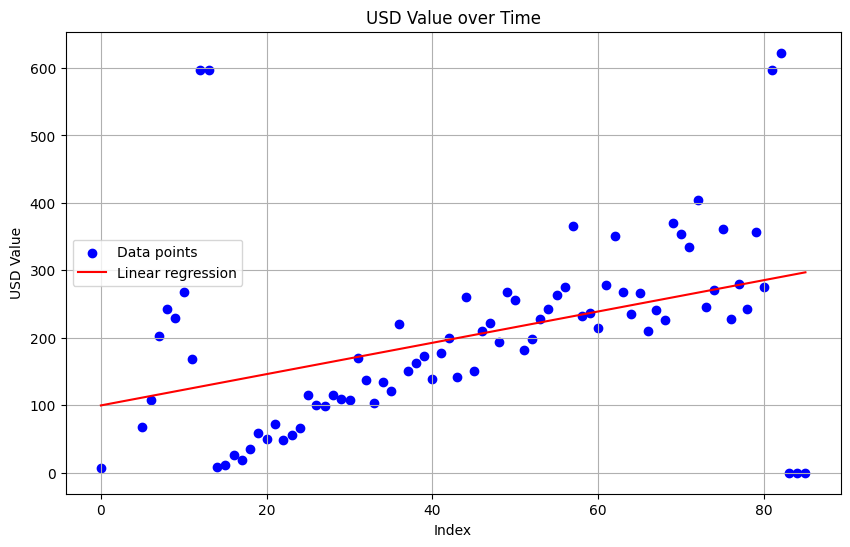

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df_0011.date, df_0011['USD Value'], color='blue', label='Data points')
X = df_0011.index.values.reshape(-1, 1)
y = df_0011['USD Value'].values
model = LinearRegression().fit(X, y)
plt.plot(X, model.predict(X), color='red', label='Linear regression')
plt.title('USD Value over Time')
plt.xlabel('Index')
plt.ylabel('USD Value')
plt.legend()
plt.grid(True)
plt.show()